This images and the equacions are from: Cássio Thomé de Faria,“Controle da Variação do Arqueamento de um Aerofólio. 2010

In [13]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math

#Ipython Libraries
# Remember to remove when you pass to Spyder.
from IPython.display import Image

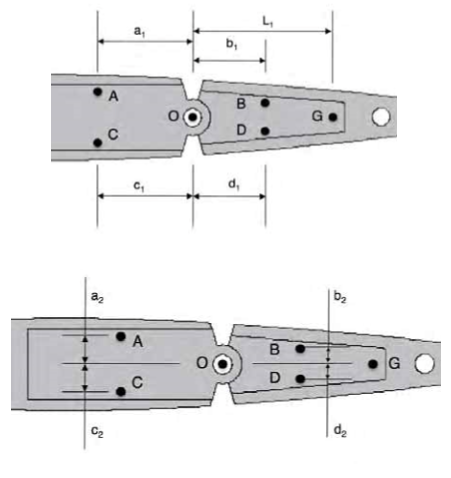

In [29]:
Image(filename='axis.png')

In [22]:
a1 = 1
a2 = 1
b1 = 1
b2 = 1
c1 = 1
c2 = 1
d1 = 1
d2 = 1
theta = math.radians(56.6737103129) # Here this angle will be converted from degrees to radians
inicial_linear_spring_lenght = 0.1 # This is the lenght of the spring
k = 10  # linear constant of the linear spring 

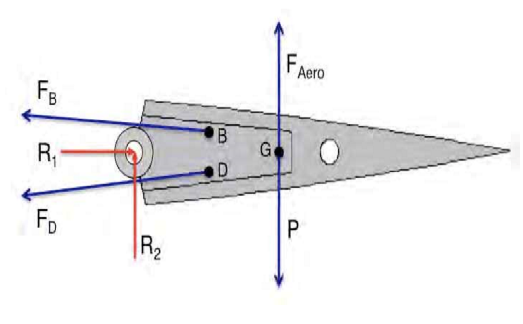

In [23]:
Image(filename='forces.png')

For now I´m using only the forces b and d, the force b are the force applied in the point b, and the force d are the force applied on the point d. 

The forces below (Force_ab and Force_cd) are the forces maked by the SMAs.  

In [24]:
def Linear_spring(k,inicial_linear_spring_lenght,x1,y1,x2,y2,theta):
    '''Calculate the final lenght of the spring'''
    def r_ab(inicial_linear_spring_lenght,x1,y1,x2,y2,theta):
        x = x1*math.cos(theta) - y2*math.sin(theta)+x1
        y = x1*math.sin(theta) + y2*math.cos(theta)-y1
        z = 0
        final_linear_spring_lenght = math.sqrt(x**2 + y**2 + z**2)
        return final_linear_spring_lenght
    
    def delta_r_ab(inicial_lenght,final_lenght):
        '''Calculate the diference btween final, and the inicial lenght of the spring'''
        delta_linear_spring_lenght = abs(final_lenght  - inicial_lenght)
        return delta_linear_spring_lenght
    
    lenght = r_ab(inicial_linear_spring_lenght,x1,y1,x2,y2,theta)
    delta_r = delta_r_ab(inicial_linear_spring_lenght,lenght)
    force = k*delta_r # Calculate the force maked by the linear spring (F= K*dx)
    return force
    
print Linear_spring(k,inicial_linear_spring_lenght,a1,a2,b1,b2,theta)

7.11035489025


Here we will put the code of the SMA model. 
The code above are incomplete.

In [18]:
def Brinson_spring(inicial_linear_spring_lenght,x1,y1,x2,y2,theta):
    def x_ab(inicial_linear_spring_lenght,x1,y1,x2,y2,theta):
        x = x1*math.cos(theta) - y2*math.sin(theta)+x1
        y = x1*math.sin(theta) + y2*math.cos(theta)-y1
        z = 0
        final_linear_spring_lenght = math.sqrt(x**2 + y**2 + z**2)
        return final_linear_spring_lenght
    
    def delta_x_ab(inicial_lenght,final_lenght):
        delta_linear_spring_lenght = final_lenght  - inicial_linear_spring_lenght
        return delta_linear_spring_lenght
    return 2 # its a number (now this force is a constante force)

The function below gives us the direction of the forces, using the concept of the Unit vector.


In [25]:
 def Unit_vector(x1,y1,x2,y2,theta):
    def Vector(x1,y1,x2,y2,theta):
        '''Create de vector will be used to get de direction to put the force produced for the SMA to the x axis'''
        x = x2*math.cos(theta) - y2*math.sin(theta)+x1
        y = x2*math.sin(theta) + y2*math.cos(theta)-y1
        vector  = [x, y , 0]
        return vector
    
    def Length_r(x1,y1,x2,y2,theta):
        """Calculate length between points A and B using Pitagoras.
        Inputs: - coordinates x and y of points 1 and 2
                - theta:rotation"""
        x = x2*math.cos(theta) - y2*math.sin(theta) + x1
        y = x2*math.sin(theta) + y2*math.cos(theta) - y1
        z = 0
        length = math.sqrt(x**2 + y**2 + z**2) 
        return length

    vec = Vector(x1,y1,x2,y2,theta)
    length = Length_r(x1,y1,x2,y2,theta)
    length = length*(-1)
    #Function map apply function division to every item of iterable and return a list of the results.
    unit = (map(lambda x: x/length, vec))
    return unit

print Unit_vector(a1,a2,b1,b2,theta)
print Unit_vector(c1,-c2,d1,-d2,theta)

[-0.8801722170622557, -0.4746544725499943, -0.0]
[-0.8801722170622557, -0.4746544725499943, -0.0]


The functoin Directed_Force multiply the force by the Unit vector.
Giving the directed force.

In [26]:
def Directed_Force(Force,Unit_Vector):
    ''' This function directs the force produced to the -(x-axis) in the cartesian coordinate system'''
    direction = Unit_Vector
    #Function map apply function multiplication to every item of iterable and return a list of the results.
    force = map(lambda x: x*Force, Unit_Vector) 
    return force
        

For now the balance of forces have just two forces, but this number will be increased as the problem is being better prepared.

Below are placed the main function.

In [27]:
unit_vector_ab = Unit_vector(a1,a2,b1,b2,theta)

unit_vector_cd = Unit_vector(c1,-c2,d1,-d2,theta)


force_ab = Linear_spring(k,inicial_linear_spring_lenght,a1,a2,b1,b2,theta)

#force_cd = Force_cd(1,x_cd) # TEM QUE CALCULAR QUEM EH O DESLOCAMENTO

'''The forces, b and c, are the forces produced by the SMAs in the points B and C.'''
force_b = Directed_Force(force_ab,unit_vector_ab)
#force_d = Directed_Force(force_cd,unit_vector_cd)
# the force d is the force maked by the SMA
print force_b

[-6.258336827846595, -3.3749617500726217, -0.0]
